# Project Journal

**Name:** Adriana Watson

**Research Question:** The Energy Policy Act of 2005 (EPAct) included legislation intended to promote the use of solar, wind, geothermal, hydroelectric, biomass, and biofuel energy consumption. Can the changes in renewable energy consumption after the implementation of EPAct be explained by the individual contributions of solar, wind, geothermal, hydroelectric, biomass, and biofuel consumption?

**Variables:**
$$Y: Total Renewable Energy \newline
X_1: Solar Energy \newline
X_2: Wind Energy \newline
X_3: Geothermal Energy \newline
X_4: Hydroelectric Power \newline
X_5: Biomass Energy Consumption \newline
X_6: Other Biofuels \newline
X_7: After\_EPAct \newline
X_8: EPAct\_Time 

## Data Prep & EDA
**Dates:** November 1 - November 7

**Meeting Date:** November 7

### Data Cleaning Summary

**Summary of data cleaning process:**
1. Load libraries
2. Import the dataset
3. Check for and fill missing values
4. Create new variables (```After_EPAct``` and ```EPAct_Time```)
5. Remove unnecessary columns

**Issues Encountered and Resolutions:**
Only minor syntax issues and forgetting to install libraries. 


In [65]:
# Step 1: Load the Necessary Libraries
#install.packages("lubridate")
#install.packages("corrplot")
#install.packages("GGally")
#install.packages("knitr")
#install.packages("olsrr")
#install.packages("reshape2")
library(GGally)      # Matrix of plots
library(dplyr)      # For data manipulation
library(ggplot2)    # For data visualization
library(lubridate)  # For date handling
library(corrplot)   # For correlation plots
library(knitr)
library(tidyr)
library(car)
library(olsrr)
library(reshape2)

Warning message:
"package 'reshape2' was built under R version 4.4.2"

Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




In [2]:
# Step 2: Import the Dataset
data <- read.csv("../USRenewableEnergyConsumption.csv")

In [3]:
# Step 3: Check for and Fill Missing Values
# Check for missing values
missing_values <- colSums(is.na(data))
print(missing_values)  # Print the count of missing values in each column

                              Year                              Month 
                                 0                                  0 
                            Sector                Hydroelectric.Power 
                                 0                                  0 
                 Geothermal.Energy                       Solar.Energy 
                                 0                                  0 
                       Wind.Energy                        Wood.Energy 
                                 0                                  0 
                      Waste.Energy Fuel.Ethanol..Excluding.Denaturant 
                                 0                                  0 
    Biomass.Losses.and.Co.products                     Biomass.Energy 
                                 0                                  0 
            Total.Renewable.Energy              Renewable.Diesel.Fuel 
                                 0                                  0 
      

In [5]:
data <- data %>%
  mutate(After_EPAct = ifelse((Year > 2005) | (Year == 2005 & Month >= 8), 1, 0),  # Binary variable
         EPAct_Time = ifelse(Year < 2005, 
                             -((2005 - Year) * 12 + (Month - 8)),  # Negative values before EPAct
                             (Year - 2005) * 12 + (Month - 8))  # Zero in Aug 2005, positive afterward
  )

In [6]:
# Step 5: Remove Unnecessary Columns and Select Relevant Columns
data <- data %>%
  select(Month = Month,                                    # Month
         Year = Year,                                      # Year
         Total_Renewable_Energy = Total.Renewable.Energy,  # Y
         Solar_Energy = Solar.Energy,                      # X_1
         Wind_Energy = Wind.Energy,                        # X_2
         Geothermal_Energy = Geothermal.Energy,            # X_3
         Hydroelectric_Power = Hydroelectric.Power,        # X_4
         Biomass_Energy_Consumption = Biomass.Energy,      # X_5
         Other_Biofuels = Other.Biofuels,                  # X_6
         After_EPAct,                                      # X_7
         EPAct_Time)                                       # X_8

In [7]:
head(data)

,Month,Year,Total_Renewable_Energy,Solar_Energy,Wind_Energy,Geothermal_Energy,Hydroelectric_Power,Biomass_Energy_Consumption,Other_Biofuels,After_EPAct,EPAct_Time
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1973,0.570,0,0,0.00,0.00,0.570,0,0,-377
2,1,1973,89.223,0,0,0.49,0.00,0.211,0,0,-377
3,1,1973,99.973,0,0,0.00,1.04,98.933,0,0,-377
4,1,1973,30.074,0,0,0.00,0.00,0.000,0,0,-377
5,1,1973,0.000,0,0,0.00,0.00,0.000,0,0,-377
6,2,1973,0.515,0,0,0.00,0.00,0.515,0,0,-378


### Exploratory Data Analysis Findings
**Key Visualizations:** 
* Based on the correlation matrix, significant correlations are: 
    * Total Renewable Energy & Biomass Energy Consumption
    * Solar Energy & Wind Energy
    * Wind Energy & Geothermal Energy
* The time series plot points to a steady increase in total renewable energy consumption after EPAct
* The histogram indicates that the mean energy consumption before and after EPAct was the same, but the range of values grew after EPAct

[1] "Significant Correlations (|correlation| > 0.5):"
                   Variable1              Variable2 Correlation
1        Hydroelectric_Power Total_Renewable_Energy   0.5011969
2 Biomass_Energy_Consumption Total_Renewable_Energy   0.6108683
3                Wind_Energy           Solar_Energy   0.7443091
4          Geothermal_Energy            Wind_Energy   0.5055562
5 Biomass_Energy_Consumption    Hydroelectric_Power   0.7199216


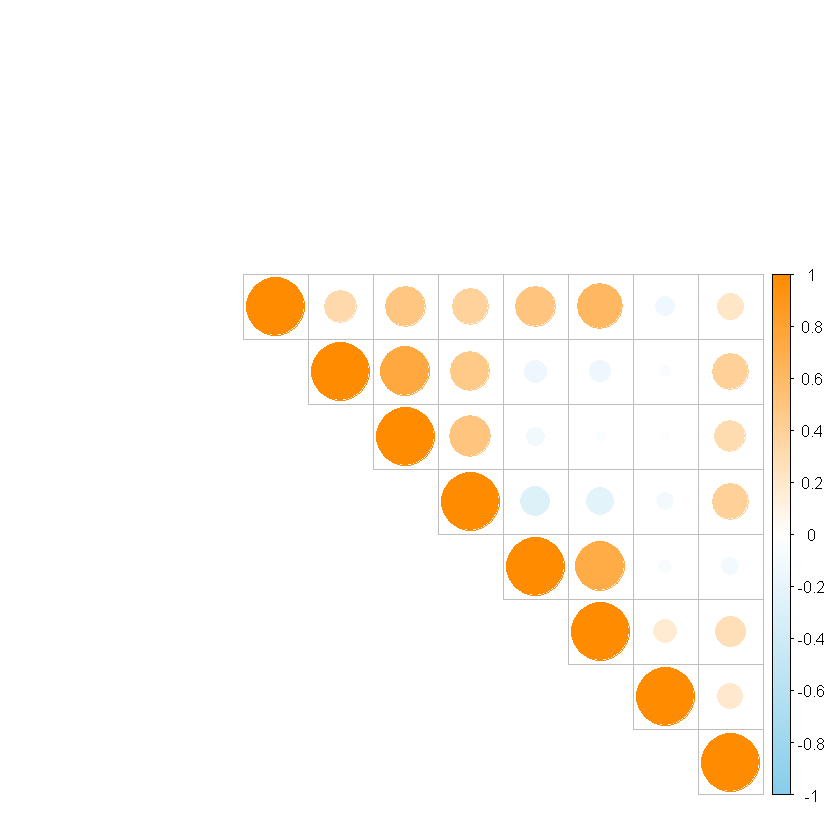

In [8]:
# Select only numeric variables, excluding 'After_EPAct' since it's binary
numeric_data <- data %>%
  select(Total_Renewable_Energy, Solar_Energy, Wind_Energy, Geothermal_Energy,
         Hydroelectric_Power, Biomass_Energy_Consumption, Other_Biofuels, EPAct_Time)

# Calculate the correlation matrix with complete observations only
correlation_matrix <- cor(numeric_data, use = "complete.obs")

# Extract significant correlations (absolute value > 0.5)
significant_correlations <- correlation_matrix[abs(correlation_matrix) > 0.5 & lower.tri(correlation_matrix, diag = FALSE)]
significant_pairs <- which(abs(correlation_matrix) > 0.5 & lower.tri(correlation_matrix, diag = FALSE), arr.ind = TRUE)
significant_correlations <- data.frame(
  Variable1 = rownames(correlation_matrix)[significant_pairs[,1]],
  Variable2 = colnames(correlation_matrix)[significant_pairs[,2]],
  Correlation = significant_correlations
)

# Print the significant correlations
print("Significant Correlations (|correlation| > 0.5):")
print(significant_correlations)

# Plot the entire correlation matrix
corrplot(
  correlation_matrix,
  method = "circle",
  type = "upper",
  col = colorRampPalette(c("skyblue", "white", "darkorange"))(200),
  tl.cex = 0.8,           # Text label size
  tl.col = "white",       # Label color
  cl.cex = 0.8            # Color legend size
)

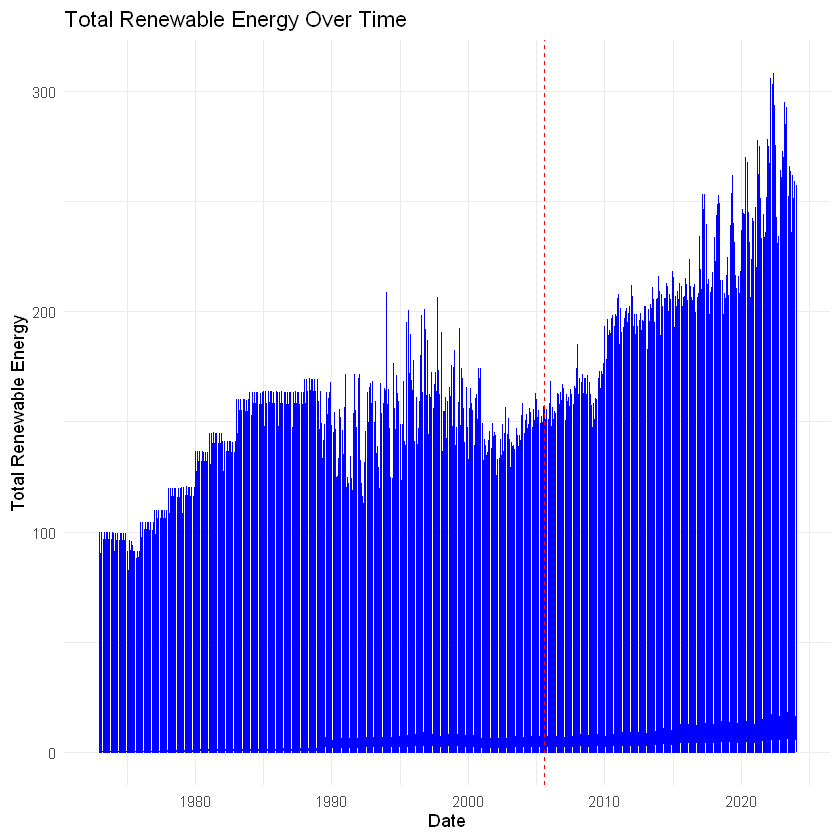

In [9]:
## Time Series Plot of Total Renewable Energy
# Create a 'Date' column for easier plotting
data <- data %>%
  mutate(Date = make_date(Year, Month))
ggplot(data, aes(x = Date, y = Total_Renewable_Energy)) +
  geom_line(color = "blue") +
  geom_vline(xintercept = as.Date("2005-08-01"), linetype = "dashed", color = "red") +
  labs(title = "Total Renewable Energy Over Time", y = "Total Renewable Energy", x = "Date") +
  theme_minimal()

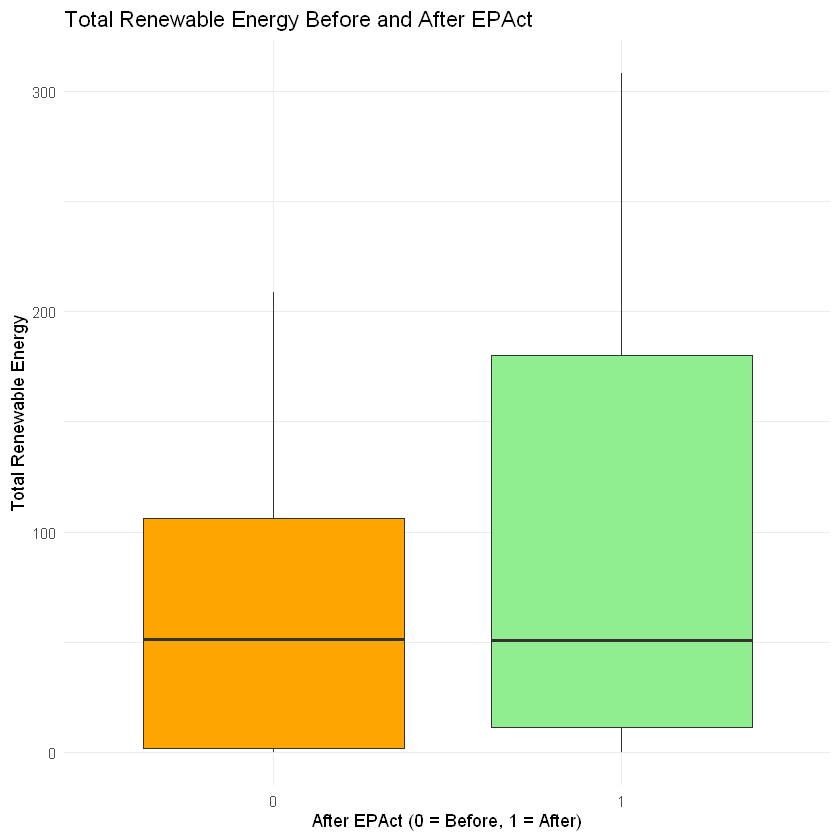

In [10]:
## Box Plot of Total Renewable Energy Before and After EPAct
ggplot(data, aes(x = as.factor(After_EPAct), y = Total_Renewable_Energy)) +
  geom_boxplot(fill = c("orange", "lightgreen")) +
  labs(title = "Total Renewable Energy Before and After EPAct", x = "After EPAct (0 = Before, 1 = After)", y = "Total Renewable Energy") +
  theme_minimal()

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


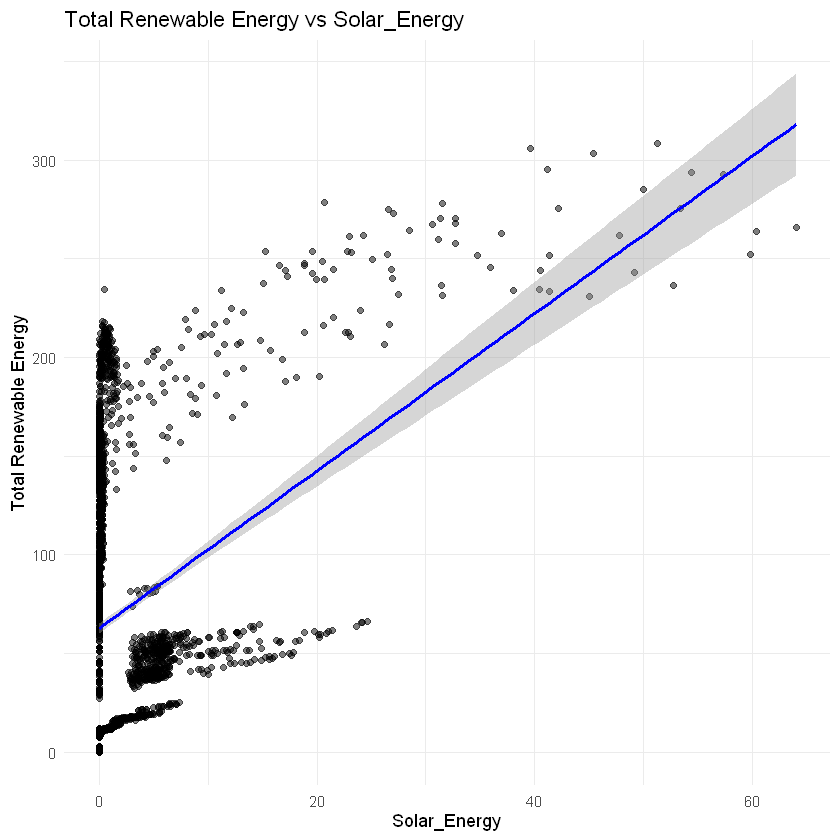

`geom_smooth()` using formula = 'y ~ x'


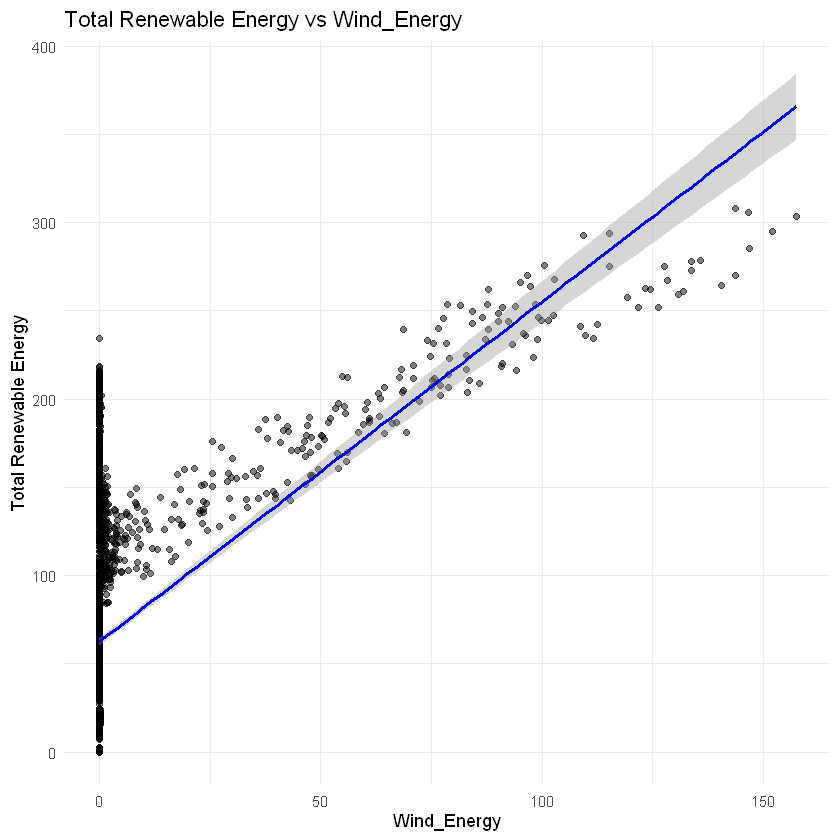

`geom_smooth()` using formula = 'y ~ x'


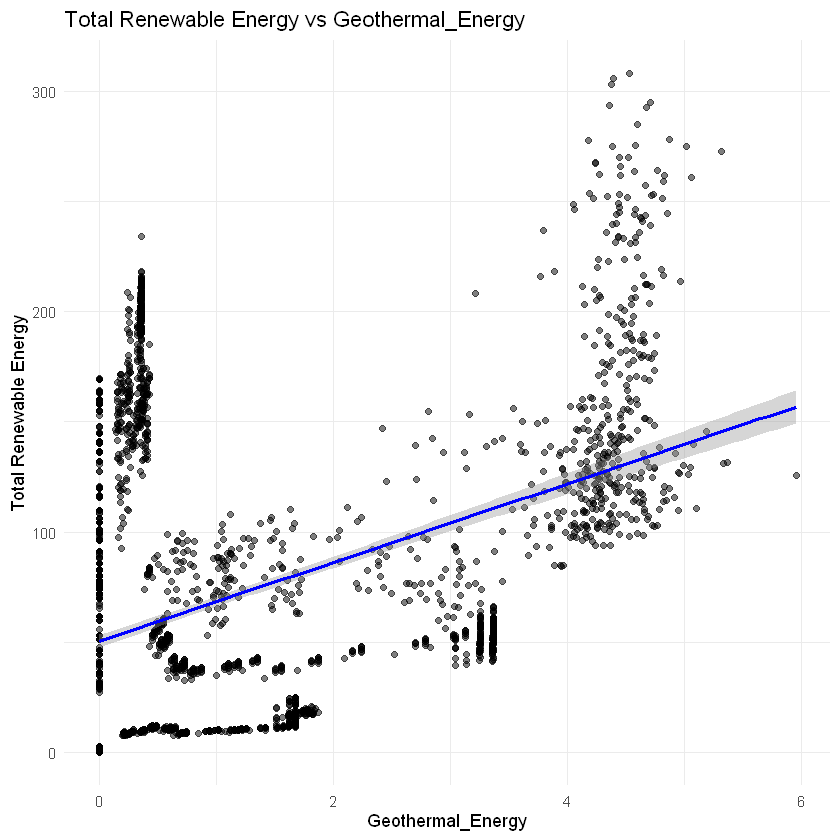

`geom_smooth()` using formula = 'y ~ x'


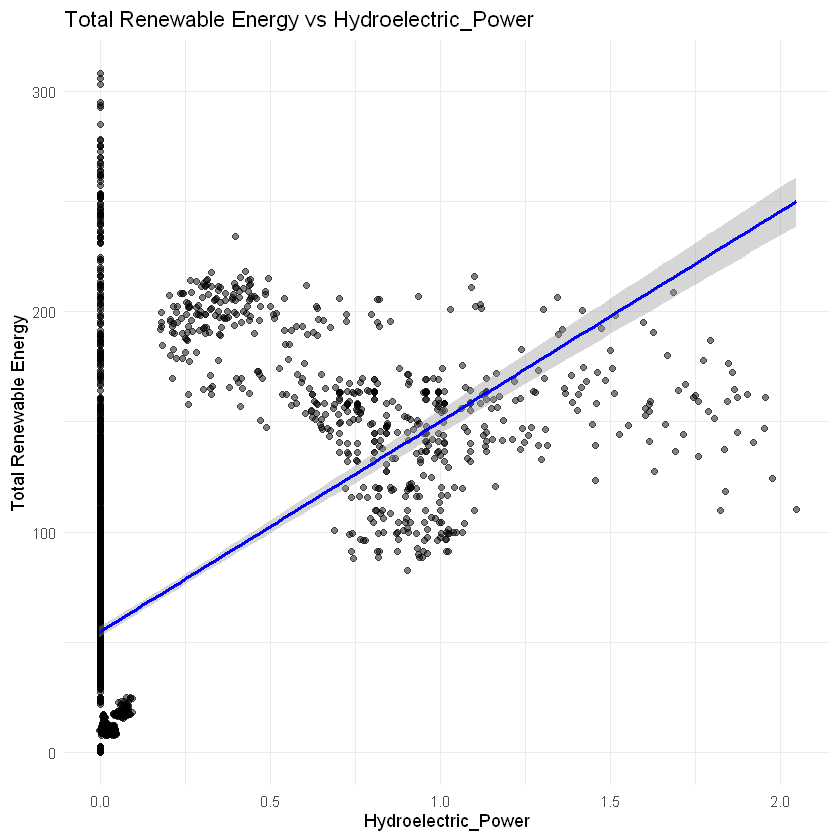

`geom_smooth()` using formula = 'y ~ x'


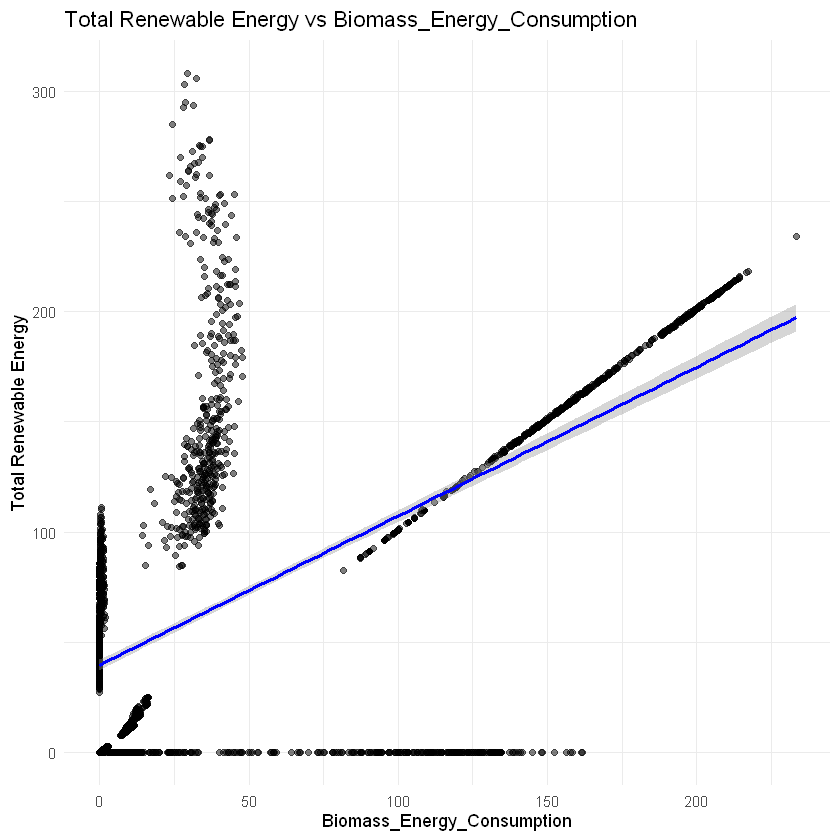

`geom_smooth()` using formula = 'y ~ x'


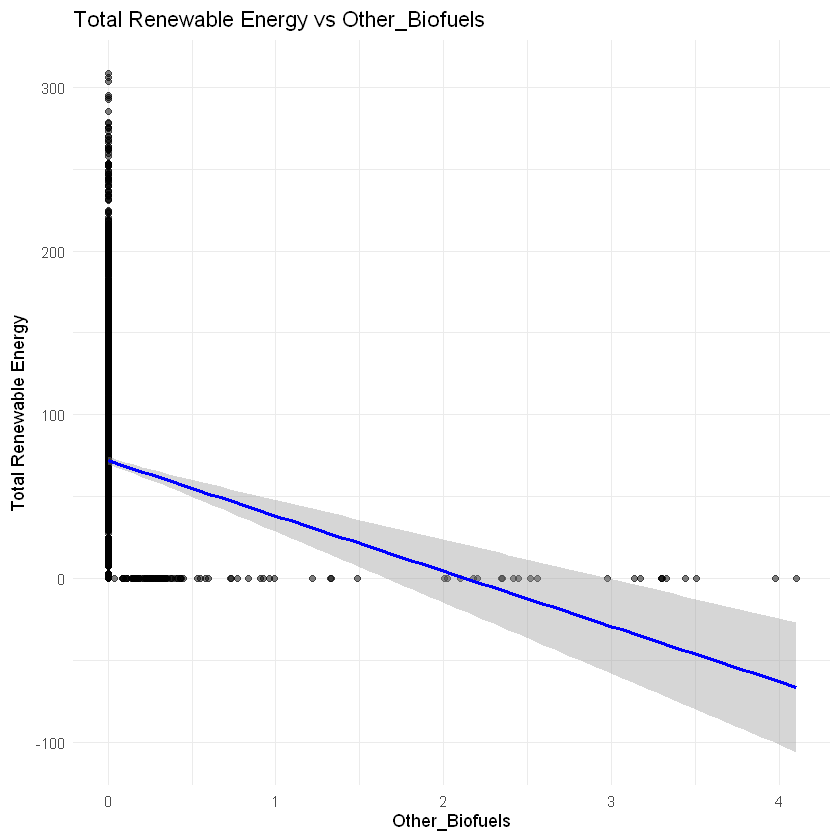

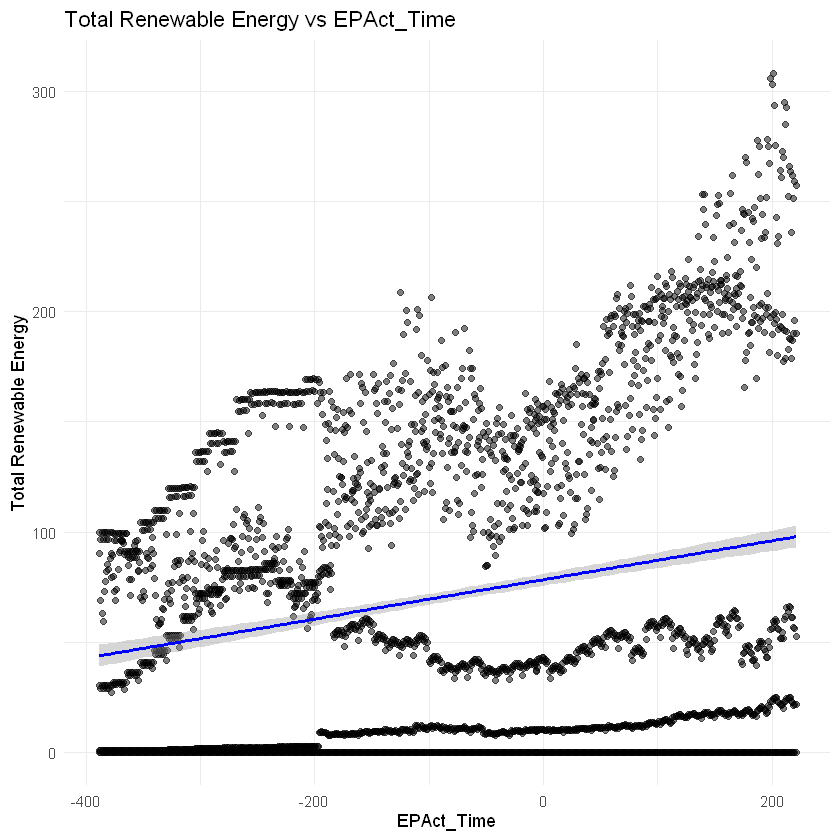

In [11]:
## Scatter Plots for each independent variable vs Total Renewable Energy
independent_vars <- c("Solar_Energy", "Wind_Energy", "Geothermal_Energy", 
                      "Hydroelectric_Power", "Biomass_Energy_Consumption", "Other_Biofuels", "EPAct_Time")
for (var in independent_vars) {
  print(ggplot(data, aes_string(x = var, y = "Total_Renewable_Energy")) +
          geom_point(alpha = 0.5) +
          geom_smooth(method = "lm", color = "blue") +
          labs(title = paste("Total Renewable Energy vs", var), y = "Total Renewable Energy", x = var) +
          theme_minimal())
}

### Summary Statistics

In [12]:
# Calculate summary statistics for each numeric column in the dataset
summary_stats <- data %>%
  summarise(
    Total_Renewable_Energy_mean = mean(Total_Renewable_Energy, na.rm = TRUE),
    Total_Renewable_Energy_sd = sd(Total_Renewable_Energy, na.rm = TRUE),
    Solar_Energy_mean = mean(Solar_Energy, na.rm = TRUE),
    Solar_Energy_sd = sd(Solar_Energy, na.rm = TRUE),
    Wind_Energy_mean = mean(Wind_Energy, na.rm = TRUE),
    Wind_Energy_sd = sd(Wind_Energy, na.rm = TRUE),
    Geothermal_Energy_mean = mean(Geothermal_Energy, na.rm = TRUE),
    Geothermal_Energy_sd = sd(Geothermal_Energy, na.rm = TRUE),
    Hydroelectric_Power_mean = mean(Hydroelectric_Power, na.rm = TRUE),
    Hydroelectric_Power_sd = sd(Hydroelectric_Power, na.rm = TRUE),
    Biomass_Energy_Consumption_mean = mean(Biomass_Energy_Consumption, na.rm = TRUE),
    Biomass_Energy_Consumption_sd = sd(Biomass_Energy_Consumption, na.rm = TRUE),
    Other_Biofuels_mean = mean(Other_Biofuels, na.rm = TRUE),
    Other_Biofuels_sd = sd(Other_Biofuels, na.rm = TRUE),
    EPAct_Time_mean = mean(EPAct_Time, na.rm = TRUE),
    EPAct_Time_sd = sd(EPAct_Time, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = everything(), 
               names_to = "Statistic", 
               values_to = "Value")  # Reshape for readability

# Display the summary statistics as a formatted table
kable(summary_stats, caption = "Summary Statistics for Key Variables", digits = 2)




Table: Summary Statistics for Key Variables

|Statistic                       |  Value|
|:-------------------------------|------:|
|Total_Renewable_Energy_mean     |  70.87|
|Total_Renewable_Energy_sd       |  71.20|
|Solar_Energy_mean               |   2.02|
|Solar_Energy_sd                 |   5.77|
|Wind_Energy_mean                |   4.28|
|Wind_Energy_sd                  |  18.12|
|Geothermal_Energy_mean          |   1.15|
|Geothermal_Energy_sd            |   1.55|
|Hydroelectric_Power_mean        |   0.17|
|Hydroelectric_Power_sd          |   0.37|
|Biomass_Energy_Consumption_mean |  46.29|
|Biomass_Energy_Consumption_sd   |  64.24|
|Other_Biofuels_mean             |   0.03|
|Other_Biofuels_sd               |   0.26|
|EPAct_Time_mean                 | -83.12|
|EPAct_Time_sd                   | 175.77|

***
## Model Building
**Dates:** November 8 - November 14

**Meeting Date:** November 14

### Model Equation

**Equation:** 
I am starting with two equations as follows (one uses ```After_EPAct```, one uses ```EPAct_Time```): 
$$Y = \beta_0 +  \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6 + \beta_7X_7 + \epsilon
\newline
Y = \beta_0 +  \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6 + \beta_8X_8 + \epsilon

### Model Fitting

In [13]:
# Model with After_EPAct
base_model_after <- lm(Total_Renewable_Energy ~ Solar_Energy + Wind_Energy + Geothermal_Energy + 
                       Hydroelectric_Power + Biomass_Energy_Consumption + Other_Biofuels + 
                       After_EPAct, data = data)

# Model with EPAct_Time
base_model_time <- lm(Total_Renewable_Energy ~ Solar_Energy + Wind_Energy + Geothermal_Energy + 
                      Hydroelectric_Power + Biomass_Energy_Consumption + Other_Biofuels + 
                      EPAct_Time, data = data)

# Summaries to assess initial fit
summary(base_model_after)
summary(base_model_time)



Call:
lm(formula = Total_Renewable_Energy ~ Solar_Energy + Wind_Energy + 
    Geothermal_Energy + Hydroelectric_Power + Biomass_Energy_Consumption + 
    Other_Biofuels + After_EPAct, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.160 -15.438  -6.326  18.574  74.512 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 11.50011    0.82437  13.950  < 2e-16 ***
Solar_Energy                 1.16132    0.14212   8.172 4.41e-16 ***
Wind_Energy                  1.13642    0.04497  25.268  < 2e-16 ***
Geothermal_Energy           21.79924    0.42113  51.763  < 2e-16 ***
Hydroelectric_Power          9.75080    2.36716   4.119 3.90e-05 ***
Biomass_Energy_Consumption   0.88852    0.01495  59.433  < 2e-16 ***
Other_Biofuels             -43.70717    2.10377 -20.776  < 2e-16 ***
After_EPAct                -39.26008    1.46009 -26.889  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Resi


Call:
lm(formula = Total_Renewable_Energy ~ Solar_Energy + Wind_Energy + 
    Geothermal_Energy + Hydroelectric_Power + Biomass_Energy_Consumption + 
    Other_Biofuels + EPAct_Time, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.441 -14.775  -3.359  16.965  73.777 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -20.17943    1.14166 -17.675  < 2e-16 ***
Solar_Energy                 1.97097    0.14057  14.021  < 2e-16 ***
Wind_Energy                  0.94309    0.04339  21.737  < 2e-16 ***
Geothermal_Energy           24.19133    0.41665  58.061  < 2e-16 ***
Hydroelectric_Power          7.34168    2.19459   3.345 0.000832 ***
Biomass_Energy_Consumption   0.94621    0.01436  65.876  < 2e-16 ***
Other_Biofuels             -38.25633    2.00366 -19.093  < 2e-16 ***
EPAct_Time                  -0.13813    0.00406 -34.022  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Resid

> Note: based on this inital run, ```EPACt_Time``` performs better (which makes sense since it's the more informative one). Both will still be asssesd in this section but only one will be used in the final model. 

### Multicollinearity

In [14]:
# VIF for the model with After_EPAct
vif_base_after <- vif(base_model_after)
print("VIF - Base Model with After_EPAct:")
print(vif_base_after)

# VIF for the model with EPAct_Time
vif_base_time <- vif(base_model_time)
print("VIF - Base Model with EPAct_Time:")
print(vif_base_time)

[1] "VIF - Base Model with After_EPAct:"
              Solar_Energy                Wind_Energy 
                  2.557502                   2.523276 
         Geothermal_Energy        Hydroelectric_Power 
                  1.619858                   2.973546 
Biomass_Energy_Consumption             Other_Biofuels 
                  3.502800                   1.120034 
               After_EPAct 
                  1.870708 


[1] "VIF - Base Model with EPAct_Time:"
              Solar_Energy                Wind_Energy 
                  2.789810                   2.618150 
         Geothermal_Energy        Hydroelectric_Power 
                  1.767815                   2.849568 
Biomass_Energy_Consumption             Other_Biofuels 
                  3.605039                   1.132754 
                EPAct_Time 
                  2.156213 


>**Explanation of Multicollinearity:**
A VIF value > 5 generally indicates possible multicollinearity issues. As all values are below this, there are no intial signs of collinearity in either model and both models have comperable collinearity. 

### Interaction Terms


In [15]:
# Interaction Model with After_EPAct
interaction_model_after <- lm(Total_Renewable_Energy ~ Solar_Energy * After_EPAct + 
                              Wind_Energy * After_EPAct + Geothermal_Energy * After_EPAct + 
                              Hydroelectric_Power * After_EPAct + Biomass_Energy_Consumption * After_EPAct + 
                              Other_Biofuels * After_EPAct, data = data)

# Interaction Model with EPAct_Time
interaction_model_time <- lm(Total_Renewable_Energy ~ Solar_Energy * EPAct_Time + 
                             Wind_Energy * EPAct_Time + Geothermal_Energy * EPAct_Time + 
                             Hydroelectric_Power * EPAct_Time + Biomass_Energy_Consumption * EPAct_Time + 
                             Other_Biofuels * EPAct_Time, data = data)


In [16]:
# VIF for interaction model with After_EPAct
vif_interaction_after <- vif(interaction_model_after, type = "predictor")
print("VIF - Interaction Model with After_EPAct:")
print(vif_interaction_after)

# VIF for interaction model with EPAct_Time
vif_interaction_time <- vif(interaction_model_time, type = "predictor")
print("VIF - Interaction Model with EPAct_Time:")
print(vif_interaction_time)

GVIFs computed for predictors



[1] "VIF - Interaction Model with After_EPAct:"
                                 GVIF Df GVIF^(1/(2*Df))
Solar_Energy                 0.000000  3        0.000000
After_EPAct                  1.000000 13        1.000000
Wind_Energy                  0.000000  3        0.000000
Geothermal_Energy            0.000000  3        0.000000
Hydroelectric_Power        128.231801  3        2.245601
Biomass_Energy_Consumption   0.000000  3        0.000000
Other_Biofuels               8.015431  3        1.414668
                                                                                                                          Interacts With
Solar_Energy                                                                                                                 After_EPAct
After_EPAct                Solar_Energy, Wind_Energy, Geothermal_Energy, Hydroelectric_Power, Biomass_Energy_Consumption, Other_Biofuels
Wind_Energy                                                                          

GVIFs computed for predictors



[1] "VIF - Interaction Model with EPAct_Time:"
                                GVIF Df GVIF^(1/(2*Df))
Solar_Energy               28.288864  3        1.745565
EPAct_Time                  1.000000 13        1.000000
Wind_Energy                30.031943  3        1.763047
Geothermal_Energy          14.981673  3        1.570098
Hydroelectric_Power        72.196026  3        2.040573
Biomass_Energy_Consumption 67.303301  3        2.016846
Other_Biofuels              6.636639  3        1.370855
                                                                                                                          Interacts With
Solar_Energy                                                                                                                  EPAct_Time
EPAct_Time                 Solar_Energy, Wind_Energy, Geothermal_Energy, Hydroelectric_Power, Biomass_Energy_Consumption, Other_Biofuels
Wind_Energy                                                                                   

>**Explanation of Interaction Terms:**
The VIF analysis for both the ```After_EPAct``` and ```EPAct_Time``` models shows generally low multicollinearity among predictors, with some moderate inflation in ```Biomass_Energy_Consumption``` and ```Hydroelectric_Power```. In the interaction models, GVIF values increase, especially for ```Hydroelectric_Power```, indicating potential multicollinearity with added interaction terms. Notably, both ```After_EPAct``` and ```EPAct_Time``` significantly interact with renewable energy sources, suggesting these terms likely capture EPAct-related shifts in consumption patterns. Despite some elevated GVIFs, the interaction models still provide insight into the distinct influences of EPAct and renewable sources over time.

### Model Peformance with AIC and BIC

In [17]:
# AIC and BIC for Base Models
aic_base_after <- AIC(base_model_after)
bic_base_after <- BIC(base_model_after)
aic_base_time <- AIC(base_model_time)
bic_base_time <- BIC(base_model_time)

# AIC and BIC for Interaction Models
aic_interaction_after <- AIC(interaction_model_after)
bic_interaction_after <- BIC(interaction_model_after)
aic_interaction_time <- AIC(interaction_model_time)
bic_interaction_time <- BIC(interaction_model_time)

# Print results
cat("AIC - Base Model with After_EPAct:", aic_base_after, "\n")
cat("BIC - Base Model with After_EPAct:", bic_base_after, "\n")
cat("AIC - Base Model with EPAct_Time:", aic_base_time, "\n")
cat("BIC - Base Model with EPAct_Time:", bic_base_time, "\n\n")

cat("AIC - Interaction Model with After_EPAct:", aic_interaction_after, "\n")
cat("BIC - Interaction Model with After_EPAct:", bic_interaction_after, "\n")
cat("AIC - Interaction Model with EPAct_Time:", aic_interaction_time, "\n")
cat("BIC - Interaction Model with EPAct_Time:", bic_interaction_time, "\n")


AIC - Base Model with After_EPAct: 29222.55 
BIC - Base Model with After_EPAct: 29276.8 
AIC - Base Model with EPAct_Time: 28889.06 
BIC - Base Model with EPAct_Time: 28943.31 

AIC - Interaction Model with After_EPAct: 28312.76 
BIC - Interaction Model with After_EPAct: 28397.15 
AIC - Interaction Model with EPAct_Time: 27618.78 
BIC - Interaction Model with EPAct_Time: 27709.2 


>**Explanation of Model Performance:** 
The AIC and BIC results indicate that the ```EPAct_Time``` models (both base and interaction) are better fits for the data compared to the ```After_EPAct``` models, as they have lower AIC and BIC values. The interaction model with ```EPAct_Time``` has the lowest AIC (27618.78) and BIC (27709.2) among all models, suggesting that including interaction terms along with a time-based EPAct variable significantly improves model performance. This implies that ```EPAct_Time``` as a continuous variable, combined with interaction terms, better captures changes in renewable energy consumption post-EPAct.

### Model Summary and Diagonostics

In [18]:
# Model summary
summary(interaction_model_time)


Call:
lm(formula = Total_Renewable_Energy ~ Solar_Energy * EPAct_Time + 
    Wind_Energy * EPAct_Time + Geothermal_Energy * EPAct_Time + 
    Hydroelectric_Power * EPAct_Time + Biomass_Energy_Consumption * 
    EPAct_Time + Other_Biofuels * EPAct_Time, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.690 -11.274   0.490   9.614  72.579 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                           -2.867e+01  1.183e+00 -24.248  < 2e-16
Solar_Energy                           5.807e+00  2.249e-01  25.823  < 2e-16
EPAct_Time                            -1.797e-01  4.901e-03 -36.671  < 2e-16
Wind_Energy                            1.323e+00  1.451e-01   9.118  < 2e-16
Geothermal_Energy                      2.471e+01  5.191e-01  47.592  < 2e-16
Hydroelectric_Power                    3.377e+01  2.396e+00  14.091  < 2e-16
Biomass_Energy_Consumption             9.606e-01  1.386e-02  69.303  < 2e-16
Other_Bi

In [19]:
# ANOVA table
anova(interaction_model_time)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Solar_Energy,1,1620462.432,1620462.4319,3395.773788,0.000000e+00
EPAct_Time,1,141980.051,141980.0508,297.527499,1.086199e-63
Wind_Energy,1,2160265.203,2160265.2029,4526.962062,0.000000e+00
Geothermal_Energy,1,378464.826,378464.8262,793.095175,2.600231e-155
Hydroelectric_Power,1,5835331.386,5835331.3861,12228.278161,0.000000e+00
Biomass_Energy_Consumption,1,2919217.721,2919217.7205,6117.391445,0.000000e+00
Other_Biofuels,1,263814.863,263814.8628,552.839472,1.725431e-112
Solar_Energy:EPAct_Time,1,184021.530,184021.5303,385.627878,6.025495e-81
EPAct_Time:Wind_Energy,1,2349.656,2349.6556,4.923841,2.656188e-02


`geom_smooth()` using formula = 'y ~ x'


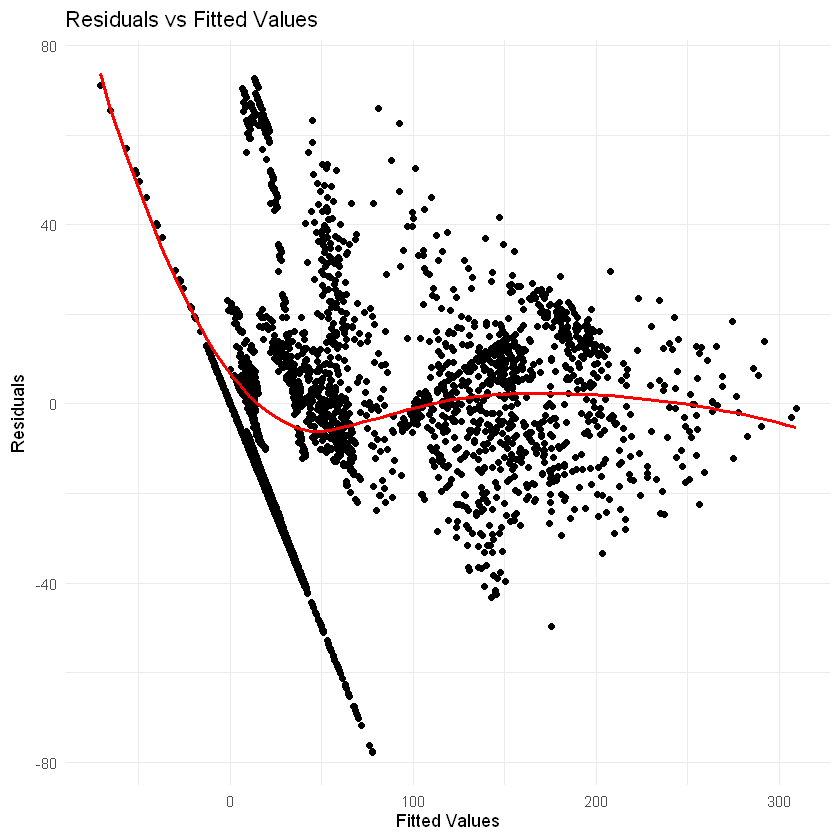

In [20]:
# Residuals vs Fitted plot (to check for homoscedasticity)
ggplot(data.frame(Fitted = fitted(interaction_model_time), Residuals = residuals(interaction_model_time)), aes(x = Fitted, y = Residuals)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, color = "red") +
  labs(x = "Fitted Values", y = "Residuals", title = "Residuals vs Fitted Values") +
  theme_minimal()

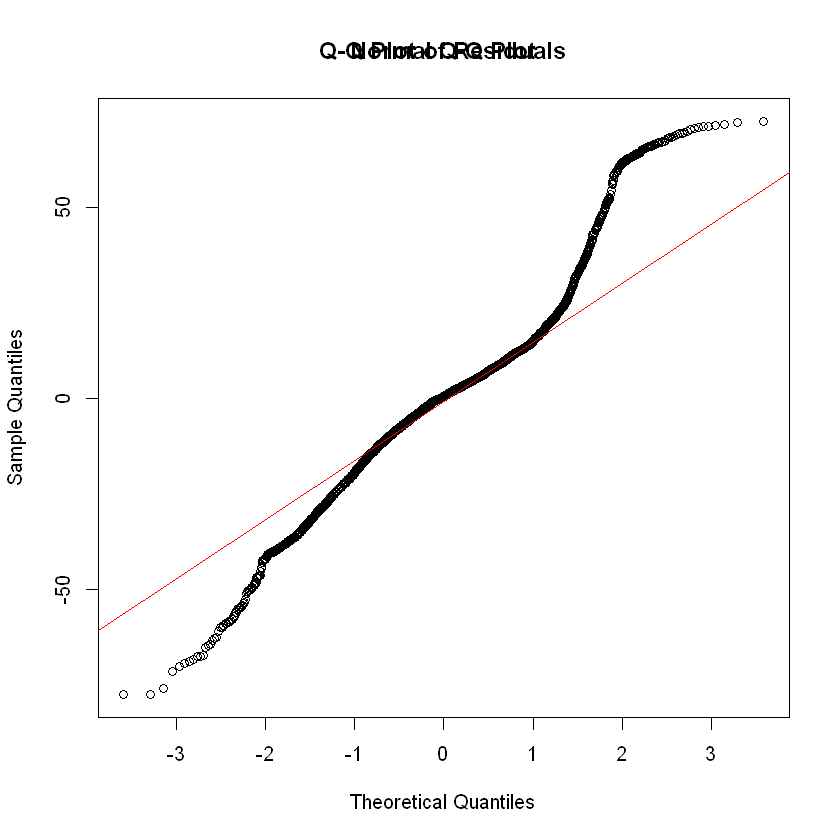

In [21]:
# Q-Q Plot (to check for normality of residuals)
qqnorm(residuals(interaction_model_time))
qqline(residuals(interaction_model_time), col = "red")
title("Q-Q Plot of Residuals")

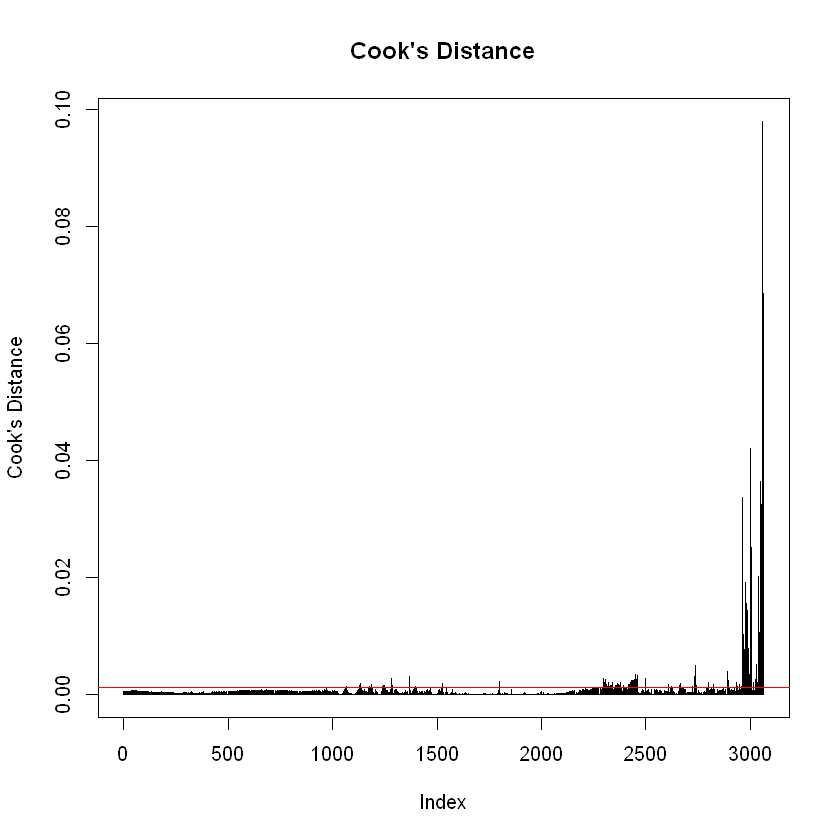

In [22]:
# Cook's Distance plot (influential points)
cooksd <- cooks.distance(interaction_model_time)
plot(cooksd, type = "h", main = "Cook's Distance", ylab = "Cook's Distance")
abline(h = 4 / length(cooksd), col = "red")  # threshold for influential points

### Feature Selection Plan
1. Initial Significance: based on the summary and ANOVA, all model terms except for ```EPAct_Time:Geothermal_Energy``` are significant. Thus, all but this term will be kept.
2. The residual analysis and Q-Q plot indicate that there is some abnormality in the first and fourth quartile of the data. Thus, certain predictors should be iteratively implemented and the plots should be remade to normalize these features. 
3. Because there's a clear spike of influential points around observation 3000, these datapoints need to be examined. They will then be removed or mitigated if they are found to be outliers. 
4. Assess feature importance using pearson correlation coefficients and update the model based on this.
5. Cross-valdate and assess the performance of the final model. 

***
## Model Evaluation & Validation
**Dates:** November 15 - November 21

**Meeting Date:** November 21

### Documentation of Model Adjustments
#### Removing Insignificant factors

In [23]:
# Interaction Model with EPAct_Time
updated_model <- lm(
                    Total_Renewable_Energy ~ Solar_Energy * EPAct_Time + 
                    Wind_Energy *  EPAct_Time + 
                    Hydroelectric_Power * EPAct_Time + 
                    Biomass_Energy_Consumption * EPAct_Time + 
                    Other_Biofuels * EPAct_Time, 
                    data = data)

In [24]:
summary(updated_model)


Call:
lm(formula = Total_Renewable_Energy ~ Solar_Energy * EPAct_Time + 
    Wind_Energy * EPAct_Time + Hydroelectric_Power * EPAct_Time + 
    Biomass_Energy_Consumption * EPAct_Time + Other_Biofuels * 
    EPAct_Time, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-99.708 -23.469  -3.716  19.674 103.026 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            7.797e+00  1.241e+00   6.284 3.78e-10
Solar_Energy                           5.967e+00  3.350e-01  17.809  < 2e-16
EPAct_Time                            -9.289e-02  5.296e-03 -17.540  < 2e-16
Wind_Energy                            5.027e+00  1.563e-01  32.172  < 2e-16
Hydroelectric_Power                    2.126e+01  3.577e+00   5.944 3.10e-09
Biomass_Energy_Consumption             8.960e-01  1.974e-02  45.379  < 2e-16
Other_Biofuels                        -7.996e+02  4.232e+01 -18.893  < 2e-16
Solar_Energy:EPAct_Time               -9.

In [36]:
# ANOVA to compare models
anova(interaction_model_time, updated_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3051,1455936,NA,NA,NA,NA
2,3053,3283990,-2,-1828053,1915.396,0


In [27]:
# AIC and BIC for comparison
AIC_original <- AIC(interaction_model_time)
BIC_original <- BIC(interaction_model_time)
AIC_updated <- AIC(updated_model)
BIC_updated <- BIC(updated_model)

cat("Original AIC:", AIC_original, "\n")
cat("Original BIC:", BIC_original, "\n")
cat("Updated AIC:", AIC_updated, "\n")
cat("Updated BIC:", BIC_updated, "\n")

Original AIC: 27618.78 
Original BIC: 27709.2 
Updated AIC: 30107.88 
Updated BIC: 30186.24 


`geom_smooth()` using formula = 'y ~ x'


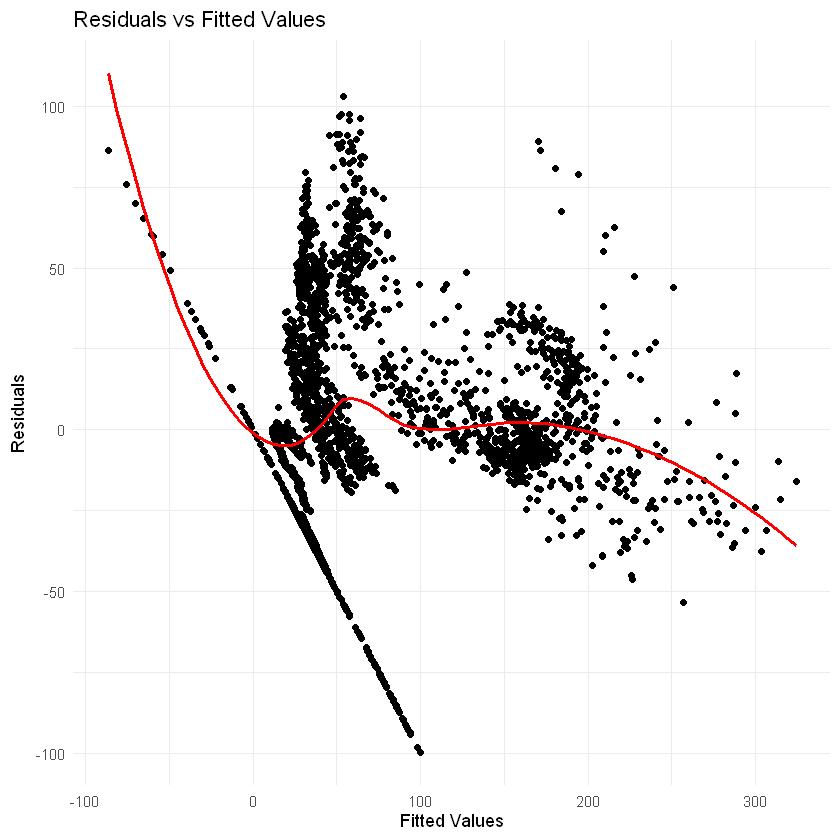

In [33]:
# Residuals vs Fitted plot (to check for homoscedasticity)
ggplot(data.frame(Fitted = fitted(updated_model), Residuals = residuals(updated_model)), aes(x = Fitted, y = Residuals)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, color = "red") +
  labs(x = "Fitted Values", y = "Residuals", title = "Residuals vs Fitted Values") +
  theme_minimal()

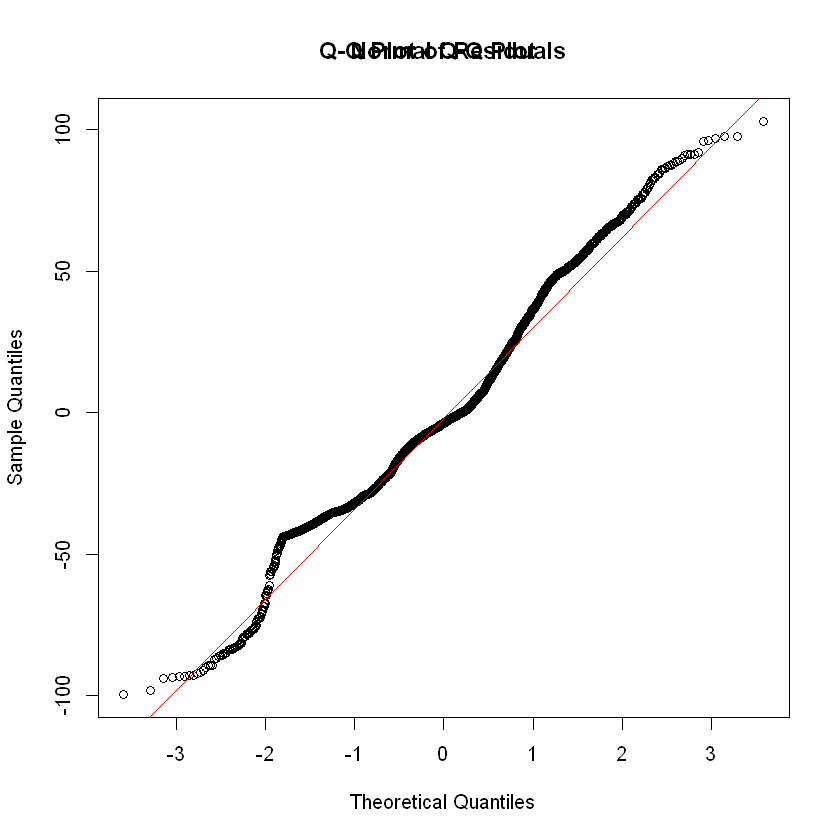

In [34]:
# Q-Q Plot (to check for normality of residuals)
qqnorm(residuals(updated_model))
qqline(residuals(updated_model), col = "red")
title("Q-Q Plot of Residuals")

>**Dicussion of Changes:** 
While removing the ```EPAct_Time:Geothermal_Energy``` made sense when examining the lack of significance, this action clearly caused a decline in performance as indicated by:
* Increased RSE
* Decreased R^2
* More unexplained variance (indicated by the F and p terms in teh ANOVA)
* Increased AIC and BIC
> However, the Q-Q Plot improved. This inidcates that the value, does contribute to the precision, explained variance, and accuracy of the model, thus it will be added back in. 

In [37]:
restored_model <- lm(
  Total_Renewable_Energy ~ Solar_Energy * EPAct_Time +
    Wind_Energy * EPAct_Time +
    Geothermal_Energy * EPAct_Time +
    Hydroelectric_Power * EPAct_Time +
    Biomass_Energy_Consumption * EPAct_Time +
    Other_Biofuels * EPAct_Time,
  data = data
)

#### Refining Residuals
Flag and remove outlier points

In [40]:
# Identify influential points (Cook's distance > 4/n)
cooks_distances <- cooks.distance(restored_model)
threshold <- 4 / nrow(data)

# Flag high-influence points
influential_points <- which(cooks_distances > threshold)

# Create a cleaned dataset excluding influential points
cleaned_data <- data[-influential_points, ]

In [39]:
cleaned_model <- lm(
  Total_Renewable_Energy ~ Solar_Energy * EPAct_Time +
    Wind_Energy * EPAct_Time +
    Geothermal_Energy * EPAct_Time +
    Hydroelectric_Power * EPAct_Time +
    Biomass_Energy_Consumption * EPAct_Time +
    Other_Biofuels * EPAct_Time,
  data = cleaned_data
)

# Summary and residual diagnostics for the cleaned model
summary(cleaned_model)


Call:
lm(formula = Total_Renewable_Energy ~ Solar_Energy * EPAct_Time + 
    Wind_Energy * EPAct_Time + Geothermal_Energy * EPAct_Time + 
    Hydroelectric_Power * EPAct_Time + Biomass_Energy_Consumption * 
    EPAct_Time + Other_Biofuels * EPAct_Time, data = cleaned_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.505  -9.452  -0.608   7.649  72.585 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                           -2.394e+01  1.117e+00 -21.433  < 2e-16
Solar_Energy                           5.692e+00  2.102e-01  27.082  < 2e-16
EPAct_Time                            -1.594e-01  4.624e-03 -34.466  < 2e-16
Wind_Energy                            1.489e+00  1.431e-01  10.401  < 2e-16
Geothermal_Energy                      2.297e+01  4.969e-01  46.228  < 2e-16
Hydroelectric_Power                    2.217e+01  2.376e+00   9.333  < 2e-16
Biomass_Energy_Consumption             9.900e-01  1.330e-02  74.455  < 2e-16


`geom_smooth()` using formula = 'y ~ x'


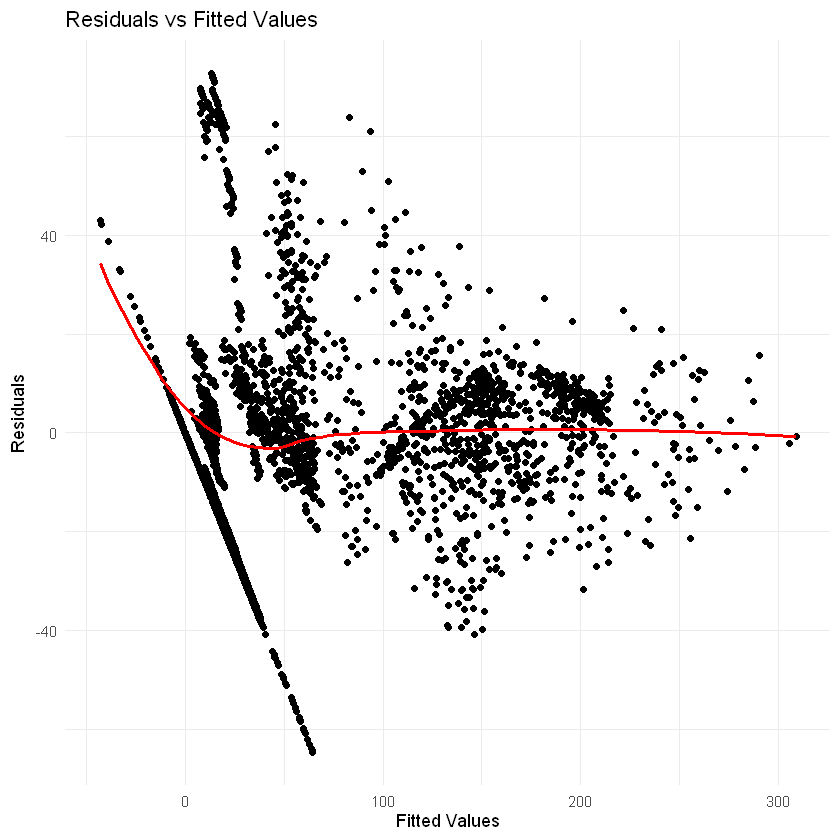

In [41]:
# Residuals vs Fitted plot (to check for homoscedasticity)
ggplot(data.frame(Fitted = fitted(cleaned_model), Residuals = residuals(cleaned_model)), aes(x = Fitted, y = Residuals)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, color = "red") +
  labs(x = "Fitted Values", y = "Residuals", title = "Residuals vs Fitted Values") +
  theme_minimal()

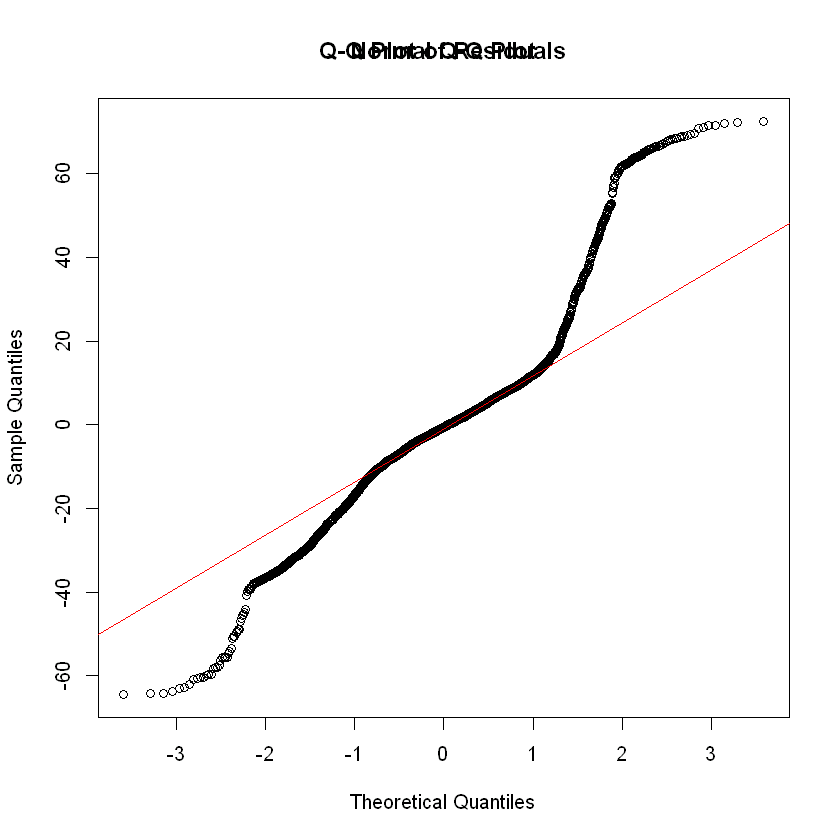

In [42]:
# Q-Q Plot (to check for normality of residuals)
qqnorm(residuals(cleaned_model))
qqline(residuals(cleaned_model), col = "red")
title("Q-Q Plot of Residuals")

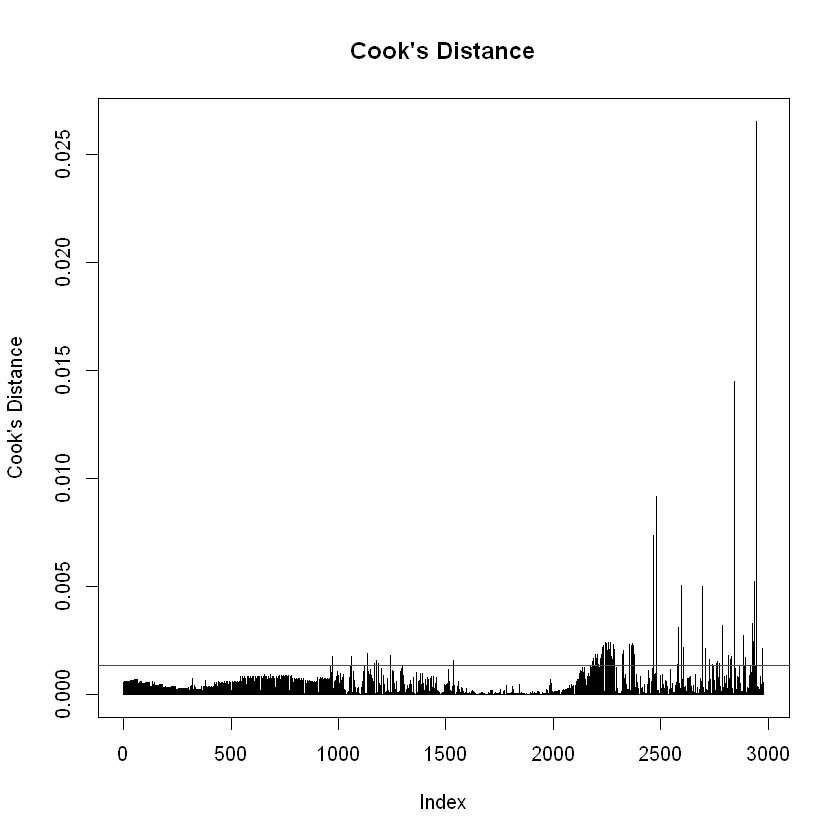

In [43]:
# Cook's Distance plot (influential points)
cooksd <- cooks.distance(cleaned_model)
plot(cooksd, type = "h", main = "Cook's Distance", ylab = "Cook's Distance")
abline(h = 4 / length(cooksd), col = "red")  # threshold for influential points

>***Discussion of Impact:***
The removal of outliers clearly improved the plot, as the residuals are better centered around zero, the Cook's distance graph is improved, and the R^2 value is increased slightly. 

#### Recalibrating the cleaned model

In [54]:
# Calculate VIF
vif_cleaned <- vif(cleaned_model)
print(vif_cleaned)


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



                         Solar_Energy                            EPAct_Time 
                            10.380666                              4.759036 
                          Wind_Energy                     Geothermal_Energy 
                            46.110588                              4.286165 
                  Hydroelectric_Power            Biomass_Energy_Consumption 
                             5.700066                              5.310815 
                       Other_Biofuels               Solar_Energy:EPAct_Time 
                            70.453212                             10.432983 
               EPAct_Time:Wind_Energy          EPAct_Time:Geothermal_Energy 
                            50.653559                              4.404793 
       EPAct_Time:Hydroelectric_Power EPAct_Time:Biomass_Energy_Consumption 
                             7.803362                              7.373616 
            EPAct_Time:Other_Biofuels 
                            67.179504

> The cleaned model clearly shows some multicollinearity problems, to address these, the model will be iteratively reduced and reassesed.

In [ ]:
# Remove Other_Biofuels and its interaction
reduced_model <- lm(
                    Total_Renewable_Energy ~ Solar_Energy * EPAct_Time + 
                    Wind_Energy * EPAct_Time + 
                    Geothermal_Energy * EPAct_Time +
                    Hydroelectric_Power * EPAct_Time + 
                    Biomass_Energy_Consumption * EPAct_Time,
                    data = cleaned_data)


vif_reduced <- vif(reduced_model)
print(vif_reduced)


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



                         Solar_Energy                            EPAct_Time 
                            10.346817                              4.404752 
                          Wind_Energy                     Geothermal_Energy 
                            45.916107                              4.079170 
                  Hydroelectric_Power            Biomass_Energy_Consumption 
                             5.237688                              5.272039 
              Solar_Energy:EPAct_Time                EPAct_Time:Wind_Energy 
                            10.361665                             50.532616 
         EPAct_Time:Geothermal_Energy        EPAct_Time:Hydroelectric_Power 
                             4.232345                              6.899463 
EPAct_Time:Biomass_Energy_Consumption 
                             7.036705 


[1] 0.9191189

[1] 0.8934376

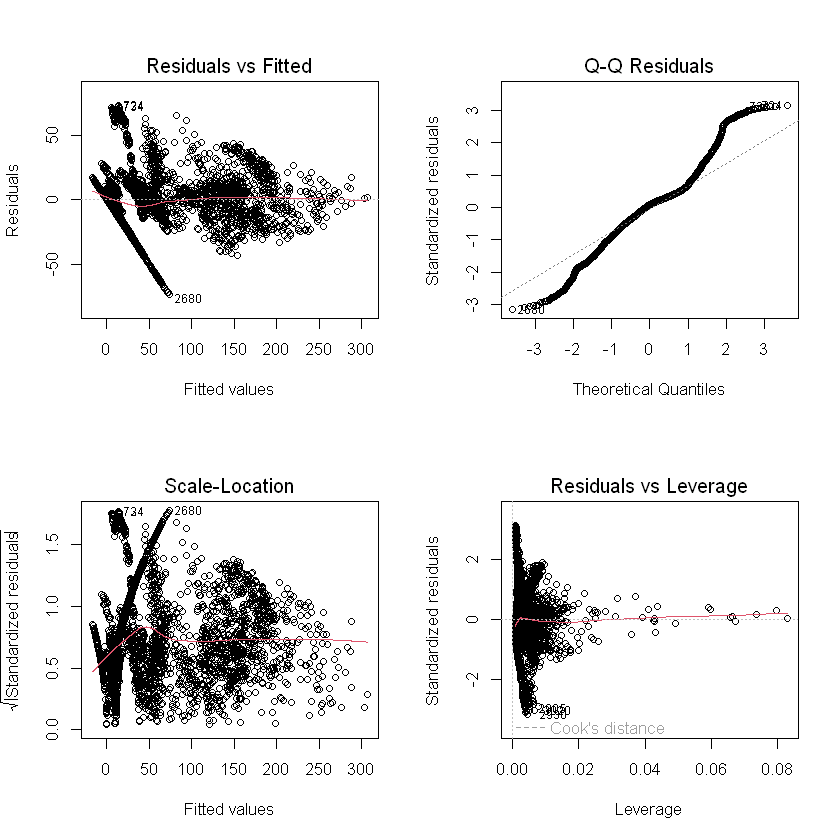

In [56]:
# Model diagnostics
par(mfrow = c(2, 2))  # Arrange plots
plot(reduced_model)

# Compare R-squared values
summary(cleaned_model)$r.squared  # Before removal
summary(reduced_model)$r.squared  # After removal

In [ ]:
# Remove Other_Biofuels and its interaction
reduced_model_2 <- lm(
                    Total_Renewable_Energy ~ Solar_Energy * EPAct_Time + 
                    Geothermal_Energy * EPAct_Time +
                    Hydroelectric_Power * EPAct_Time + 
                    Biomass_Energy_Consumption * EPAct_Time,
                    data = cleaned_data)


vif_reduced_2 <- vif(reduced_model_2)
print(vif_reduced_2)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



                         Solar_Energy                            EPAct_Time 
                             9.435136                              3.570997 
                    Geothermal_Energy                   Hydroelectric_Power 
                             1.988630                              5.153405 
           Biomass_Energy_Consumption               Solar_Energy:EPAct_Time 
                             4.879405                              8.584670 
         EPAct_Time:Geothermal_Energy        EPAct_Time:Hydroelectric_Power 
                             2.666445                              6.875748 
EPAct_Time:Biomass_Energy_Consumption 
                             6.894739 


[1] 0.8934376

[1] 0.8762492

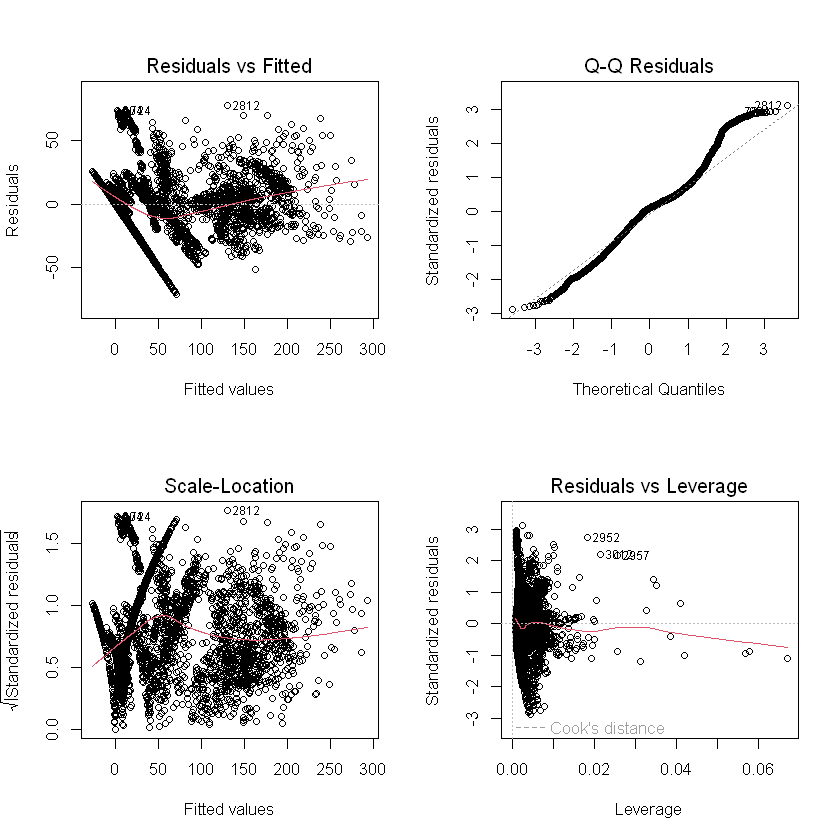

In [59]:
# Model diagnostics
par(mfrow = c(2, 2))  # Arrange plots
plot(reduced_model_2)

# Compare R-squared values
summary(reduced_model)$r.squared  # Before removal
summary(reduced_model_2)$r.squared  # After removal

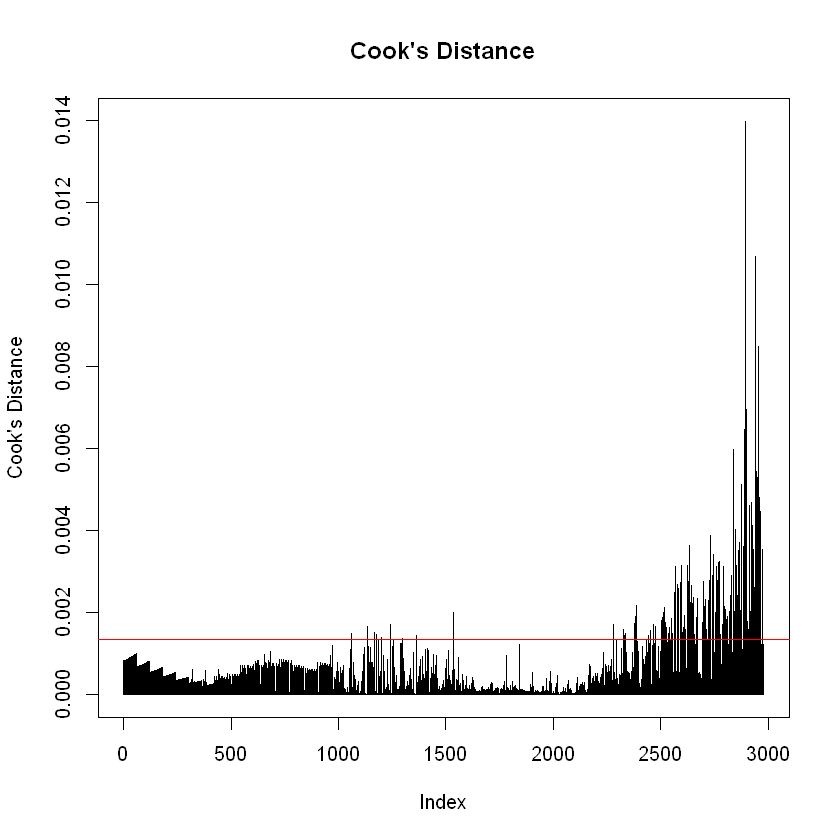

In [60]:
# Cook's Distance plot (influential points)
cooksd <- cooks.distance(reduced_model_2)
plot(cooksd, type = "h", main = "Cook's Distance", ylab = "Cook's Distance")
abline(h = 4 / length(cooksd), col = "red")  # threshold for influential points

> Removing ```Other_Biofuels``` and ```Wind``` from the cleaned plot significantly improved multicollinearity and had a small negative impact on the R^2 value. This indicates that significant outliers were 'masking' some of the multicollinearity in earlier models. For this reason, the analysis will move forward with these factors removed. 

#### Addressing the Mysterious Diagonal Line in the Residual Plot
The diagonal line on the left-hand side of the residual plot may indicate nonlinearity or a missing interaction term. To address this, some tests with polynomial terms will be conducted. 

`geom_smooth()` using formula = 'y ~ x'


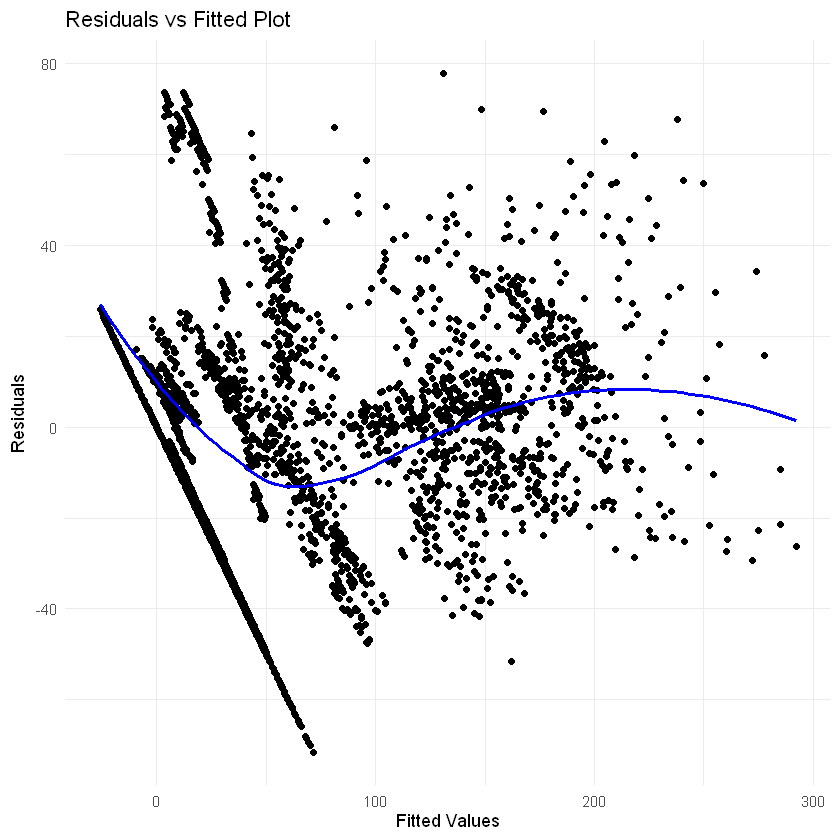

In [62]:
# Residuals vs Fitted plot
ggplot(data = data.frame(Fitted = fitted(reduced_model_2), Residuals = residuals(reduced_model_2)), 
       aes(x = Fitted, y = Residuals)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, color = "blue") +
  theme_minimal() +
  labs(title = "Residuals vs Fitted Plot", x = "Fitted Values", y = "Residuals")


Warning message:
"attributes are not identical across measure variables; they will be dropped"


`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.78704"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.78804"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1.8973e-29"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1e-06"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"at  -0.012215"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"radius  0.00014921"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"all data on boundary of neighborhood. make span bigger"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = par

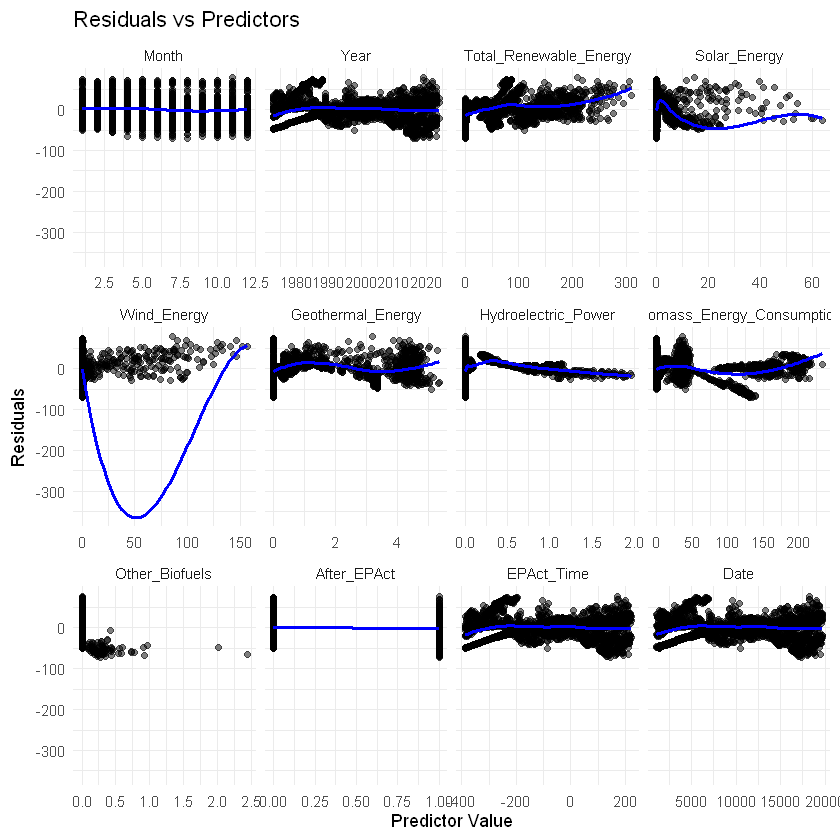

In [68]:
# Residuals vs Predictor plots
predictors <- names(cleaned_data)[-1]  # Exclude the response variable
residuals_data <- data.frame(cleaned_data, Residuals = residuals(reduced_model_2))
residuals_long <- melt(residuals_data, id.vars = c("Residuals"))

ggplot(residuals_long, aes(x = value, y = Residuals)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "loess", se = FALSE, color = "blue") +
  facet_wrap(~variable, scales = "free_x") +
  theme_minimal() +
  labs(title = "Residuals vs Predictors", x = "Predictor Value", y = "Residuals")


`geom_smooth()` using formula = 'y ~ x'


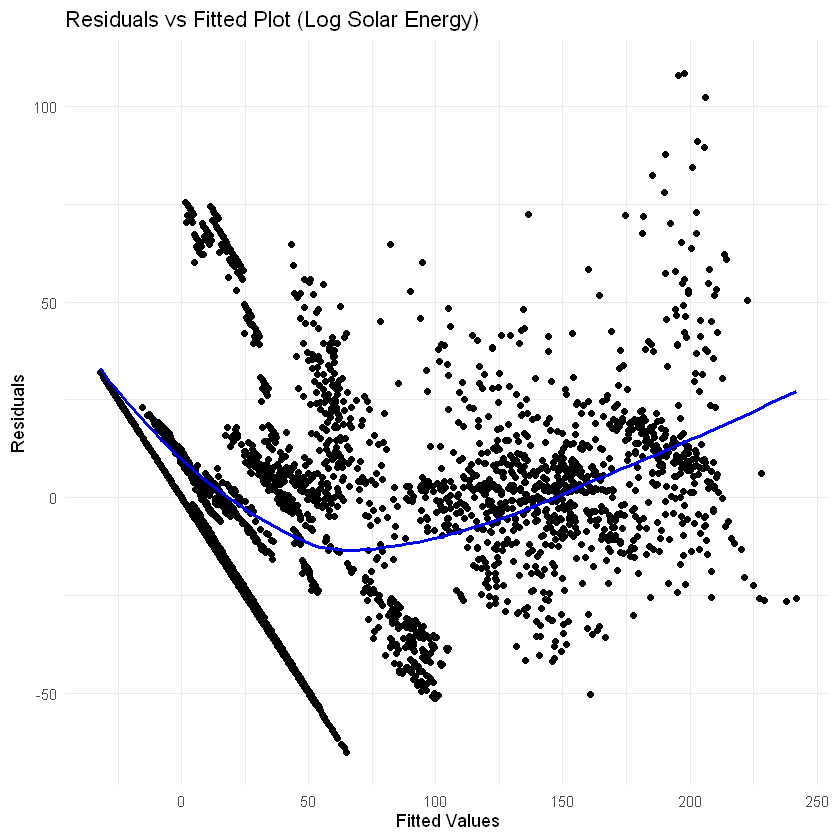

In [70]:
# Apply log transformation (add small constant to avoid log(0))
cleaned_data$log_Solar_Energy <- log(cleaned_data$Solar_Energy + 1)

# Update the model
solar_log_model <- lm(
    Total_Renewable_Energy ~ log_Solar_Energy * EPAct_Time + 
    Geothermal_Energy * EPAct_Time +
    Hydroelectric_Power * EPAct_Time + 
    Biomass_Energy_Consumption * EPAct_Time,
    data = cleaned_data
)

# Residuals vs Fitted
ggplot(data = data.frame(Fitted = fitted(solar_log_model), Residuals = residuals(solar_log_model)), 
       aes(x = Fitted, y = Residuals)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, color = "blue") +
  theme_minimal() +
  labs(title = "Residuals vs Fitted Plot (Log Solar Energy)", x = "Fitted Values", y = "Residuals")


`geom_smooth()` using formula = 'y ~ x'


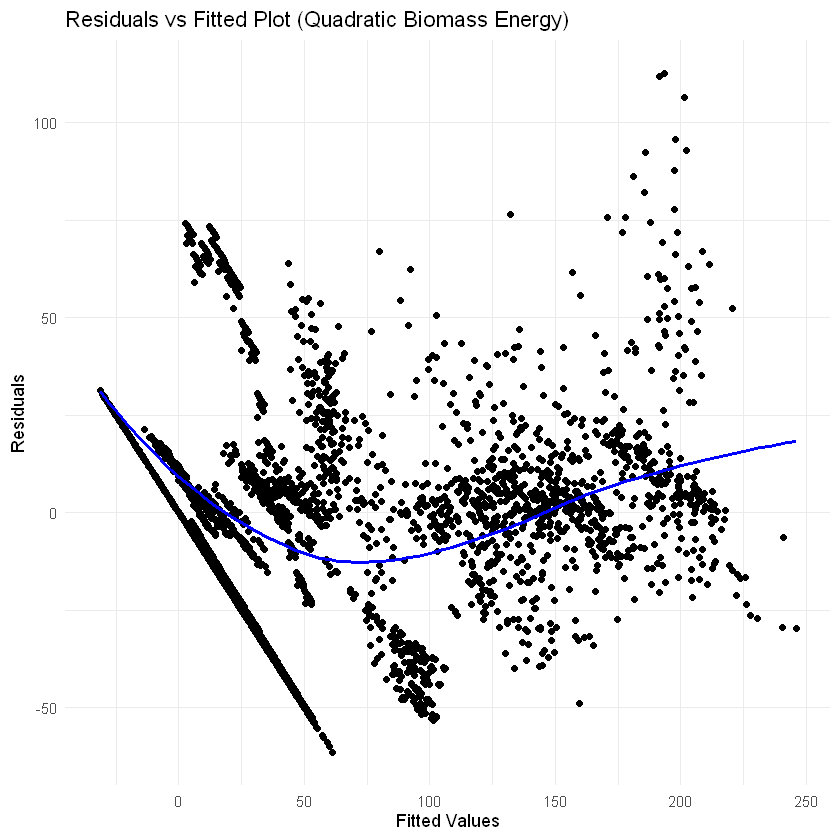

In [75]:
# Create quadratic term for Biomass_Energy_Consumption
cleaned_data$Biomass_Energy_Squared <- cleaned_data$Biomass_Energy_Consumption^2

# Update the model
biomass_quad_model <- lm(
    Total_Renewable_Energy ~ log_Solar_Energy * EPAct_Time + 
    Geothermal_Energy * EPAct_Time +
    Hydroelectric_Power * EPAct_Time + 
    Biomass_Energy_Consumption * EPAct_Time +
    Biomass_Energy_Squared,
    data = cleaned_data
)

# Residuals vs Fitted
ggplot(data = data.frame(Fitted = fitted(biomass_quad_model), Residuals = residuals(biomass_quad_model)), 
       aes(x = Fitted, y = Residuals)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, color = "blue") +
  theme_minimal() +
  labs(title = "Residuals vs Fitted Plot (Quadratic Biomass Energy)", x = "Fitted Values", y = "Residuals")


`geom_smooth()` using formula = 'y ~ x'


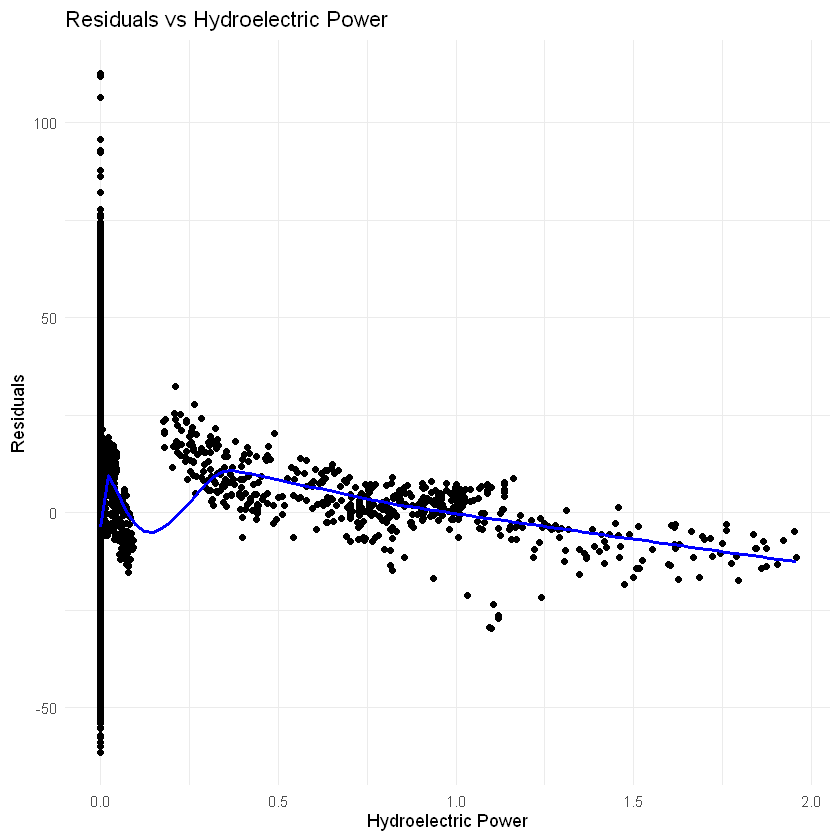

In [76]:
# Check Hydroelectric_Power's relationship with residuals
residuals_hydro <- data.frame(
    Hydroelectric_Power = cleaned_data$Hydroelectric_Power,
    Residuals = residuals(biomass_quad_model)
)

ggplot(residuals_hydro, aes(x = Hydroelectric_Power, y = Residuals)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, color = "blue") +
  theme_minimal() +
  labs(title = "Residuals vs Hydroelectric Power", x = "Hydroelectric Power", y = "Residuals")


Summary of iterative process:
1. Examined the significance of ```EPAct_Time:Geothermal_Energy``` in the model and chose to keep this model due to model deterioration upon removal. 
2. Identified and removed outlier terms. 
3. Then I did this because...

Final Model Equation: 

### Model Evaluation
#### Significance Tests

In [ ]:
# Add your significance test code with outputs here

#### Model Performance Metrics

In [ ]:
# Add your model performance code with outputs here

### Validation Findings

In [ ]:
# Add any validation code here

### Summary of Findings

[Summarize your findings from the model evaluation and validation here. Don't forget to bring it back to your hypothesis and include your final model!]

***
Team Reminder: After this meeting, agree on a report/presentation format and make all of the needed documentation.

***
## Report and Presentation
**Dates:** November 22 - December 1

**Meeting Date:** November 28

No code neccesary here (yay)! Use the space below to brainstorm which graphs you want to include in the report and how you want to tell the story of your model!